## Imports

In [123]:
import pandas as pd
import numpy as np

# Data processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.feature_selection import SelectKBest, f_classif


# Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

df = pd.read_csv('hospital_readmissions.csv')


## Data Preprocessing


## Imports

In [124]:
import pandas as pd
import numpy as np

# Data processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# EDA
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('hospital_readmissions.csv')

## Data Preprocessing


### Data Inspect

In [125]:
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

### Handle Missing Values

In [126]:
df.isnull().sum()
df.fillna(df.median(), inplace=True)

/var/folders/56/1921flkx7_g0hh5l6jptpsxw0000gn/T/ipykernel_87969/2763228215.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


### Encode Categorical Variables

In [127]:
df = pd.get_dummies(df, drop_first=True)

### Normalize Numerical Feature

In [128]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

### Split Data

In [129]:
X = df_scaled.drop('readmitted_yes', axis=1)
Y = df_scaled['readmitted_yes']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

## Exploratory Data Analysis (EDA)

### Visualize Data

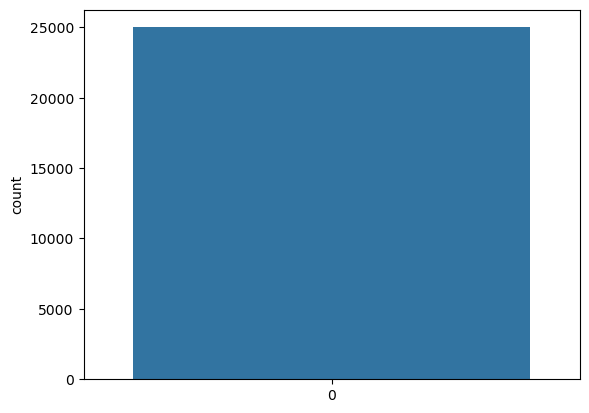

<function matplotlib.pyplot.show(close=None, block=None)>

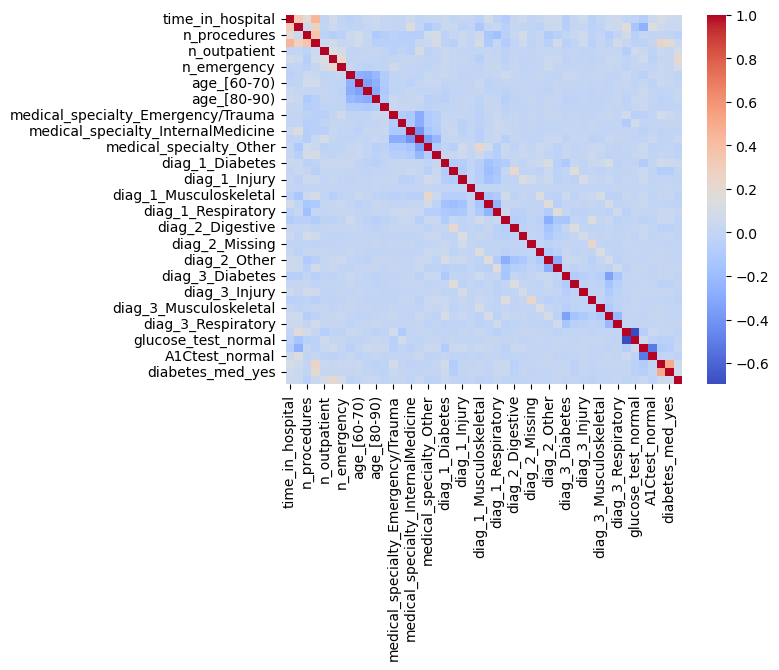

In [130]:
sns.countplot(df['readmitted_yes'])
plt.show()

sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show

### Key insights

In [131]:
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

strong_corr = [column for column in upper.columns if any(upper[column] > 0.5)]
print("Strongly correlated features:", strong_corr)

Strongly correlated features: ['glucose_test_normal', 'A1Ctest_normal', 'diabetes_med_yes']


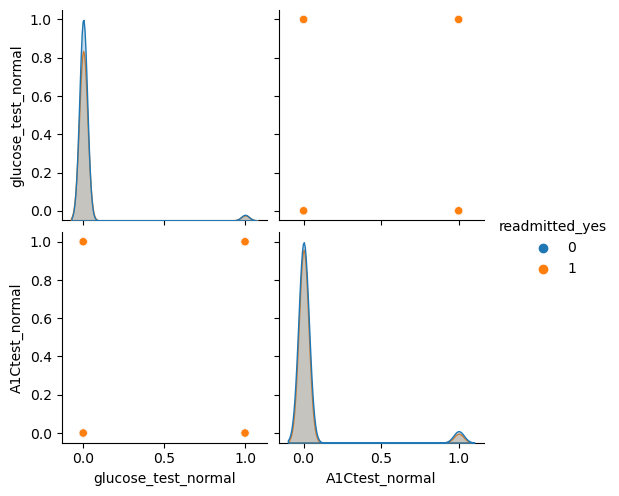

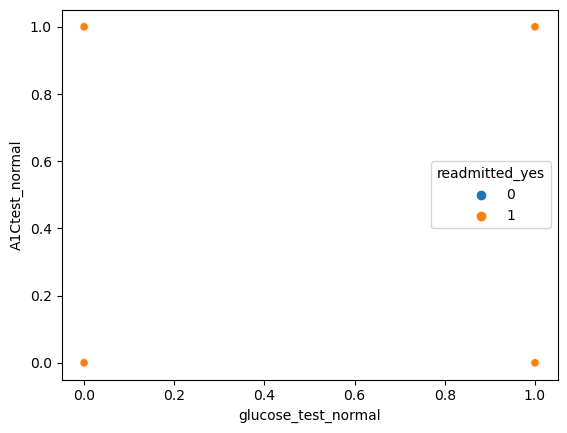

In [132]:
# Pairplot for strongly correlated features
sns.pairplot(df[strong_corr[:-1] + ['readmitted_yes']], hue='readmitted_yes')
plt.show()

# Scatter plot for a pair of strongly correlated features
sns.scatterplot(data=df, x='glucose_test_normal', y='A1Ctest_normal', hue='readmitted_yes')
plt.show()

## Exploratory Data Analysis (EDA)

### Visualize Data

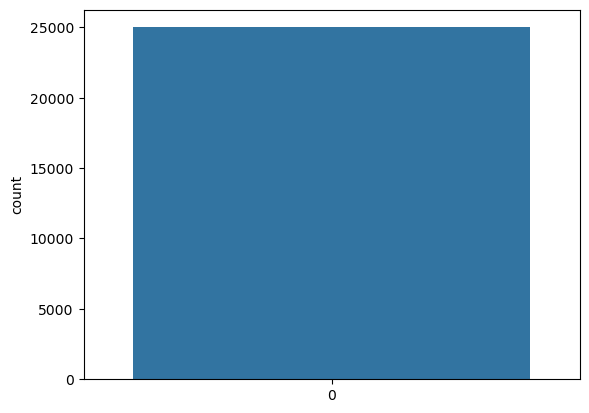

<function matplotlib.pyplot.show(close=None, block=None)>

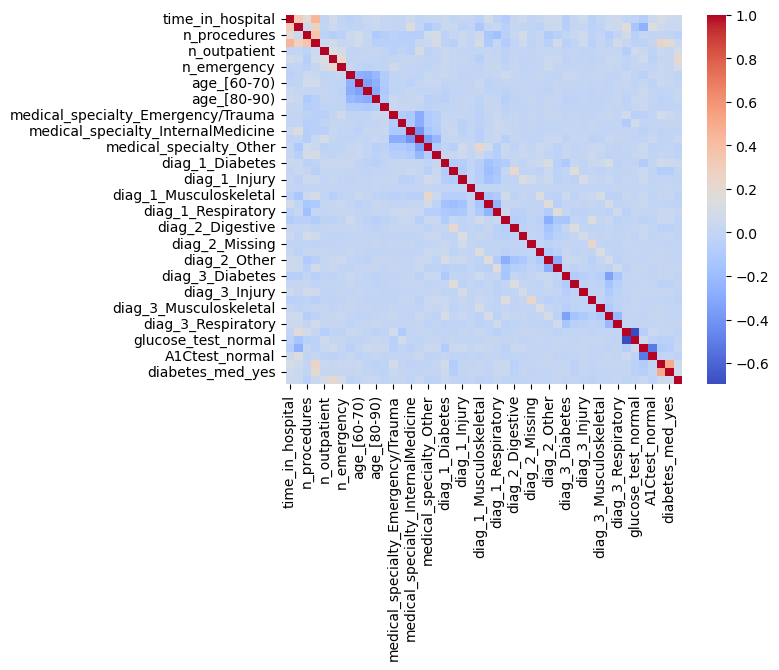

In [133]:
sns.countplot(df['readmitted_yes'])
plt.show()

sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show

### Key insights

In [134]:
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

strong_corr = [column for column in upper.columns if any(upper[column] > 0.5)]
print("Strongly correlated features:", strong_corr)

Strongly correlated features: ['glucose_test_normal', 'A1Ctest_normal', 'diabetes_med_yes']


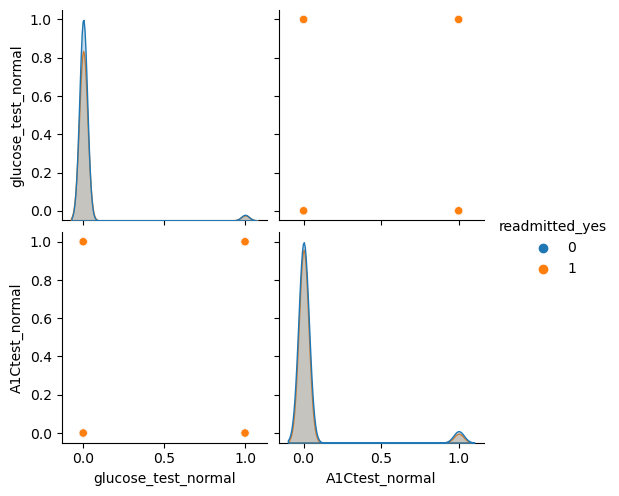

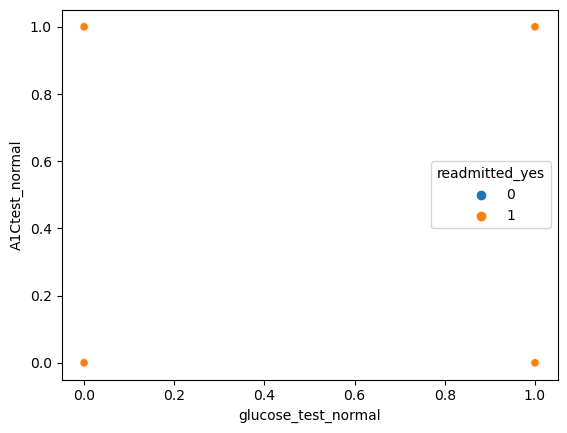

In [135]:
# Pairplot for strongly correlated features
sns.pairplot(df[strong_corr[:-1] + ['readmitted_yes']], hue='readmitted_yes')
plt.show()

# Scatter plot for a pair of strongly correlated features
sns.scatterplot(data=df, x='glucose_test_normal', y='A1Ctest_normal', hue='readmitted_yes')
plt.show()

## Feature Engineering

### New Feature 

In [136]:
df['new_feature'] = df['glucose_test_normal'] / df['A1Ctest_normal']  # Example: create a new feature

### Feature Selection

In [137]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, Y)

### Model and Training

### Model Selection

In [138]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

### Train and evaluate models

In [139]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f'{name}: {scores.mean()}')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hoangquocly/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hoangquocly/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1204, in fit
    check_classification_targets(y)
  File "/Users/hoangquocly/anaconda3/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 207, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


## Model Evaluation

In [ ]:

best_model = models['Random Forest']
best_model.fit(X_train, Y_train)
Y_pred = best_model.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('ROC-AUC:', roc_auc_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

best_model = models['Random Forest']
best_model.fit(X_train, Y_train)
Y_pred = best_model.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('ROC-AUC:', roc_auc_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.6072
ROC-AUC: 0.6010307410270398
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      2658
           1       0.60      0.50      0.55      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.61      0.60      5000

Accuracy: 0.6076
ROC-AUC: 0.6015592520268155
              precision    recall  f1-score   support

           0       0.62      0.70      0.65      2658
           1       0.60      0.51      0.55      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.61      0.60      5000

